## Demo of using ZeroMeasurements

In [1]:
from noisy_load_profiles import perturbations, Pipeline
import numpy as np
import matplotlib.pyplot as plt

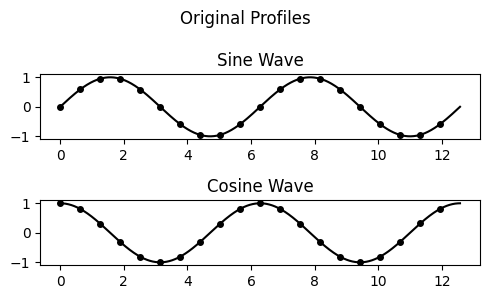

In [2]:
# build original load profiles, a sine and a cosine wave
timesteps = 1000
t = np.linspace(0, 4 * np.pi, timesteps)
original_profiles = np.array([np.sin(t), np.cos(t)])
original_profiles = original_profiles.T # shape (timesteps, 2)


# plot original profiles
fig, axs = plt.subplots(2, 1, figsize=(5, 3))

axs[0].plot(t, original_profiles[:, 0], label='Original Sine Wave', color="black", marker='o', markersize=4, markevery=50)
axs[0].set_title('Sine Wave')

axs[1].plot(t, original_profiles[:, 1], label='Original Cosine Wave', color='black',  marker='o', markersize=4, markevery=50)
axs[1].set_title('Cosine Wave')

fig.suptitle('Original Profiles')
fig.tight_layout()

In [3]:
help(perturbations.ZeroMeasurements)

Help on class ZeroMeasurements in module noisy_load_profiles.perturbations.measurement:

class ZeroMeasurements(noisy_load_profiles.base.Perturbation)
 |  ZeroMeasurements(f_zero: Optional[float] = None, k_max: Optional[int] = None, tail_eps: float = 0.1, alpha: Optional[float] = None, beta: Optional[float] = None, per_column_independent: bool = True, seed: Optional[int] = None, transformation: Optional[Dict[str, Any]] = None, track_input_profiles: bool = False)
 |
 |  Put Simply, this sometimes sets a measurements to zero, simulating an outage or a measurement error.
 |
 |  This is done using a 2-state Markov Model, with states 0 = normal and 1 = zero/outage.
 |  If the MM is in state 0, there is a probability alpha of transitioning to state 1 in the next time step.
 |  If the MM is in state 1, there is a probability beta of transitioning back to state 0 in the next time step.
 |
 |  Parameters
 |  ----------
 |  f_zero : float, optional
 |      Target long-run fraction of zeros, in (

In [4]:
# initialize a perturbation
perturbation = perturbations.ZeroMeasurements(f_zero=0.1, k_max=100)

# add a perturbation to a pipeline
pipeline = Pipeline([perturbation])

# apply the perturbation to the profiles
perturbed_profiles = pipeline.apply(original_profiles)


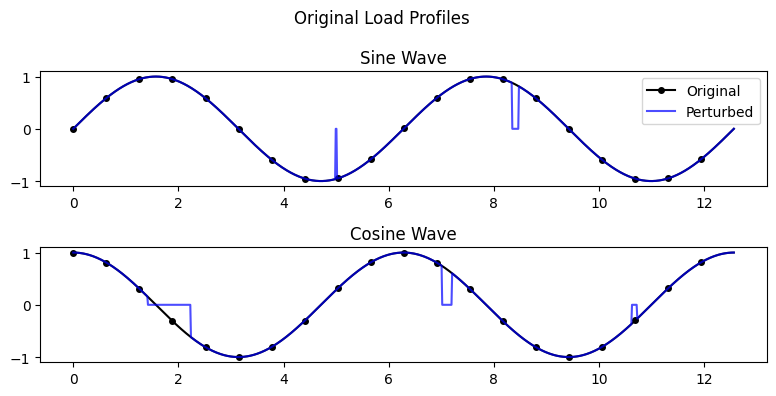

In [5]:
fig, axs = plt.subplots(2, 1, figsize=(8, 4))

axs[0].plot(t, original_profiles[:, 0], label='Original', color="black", marker='o', markersize=4, markevery=50)
axs[0].plot(t, perturbed_profiles[:, 0], label='Perturbed', color='blue', alpha=0.7)
axs[0].set_title('Sine Wave')
axs[0].legend()

axs[1].plot(t, original_profiles[:, 1], label='Original', color='black',  marker='o', markersize=4, markevery=50)
axs[1].plot(t, perturbed_profiles[:, 1], label='Perturbed', color='blue' , alpha=0.7)
axs[1].set_title('Cosine Wave')


fig.suptitle('Original Load Profiles')
fig.tight_layout()

In [14]:
(perturbed_profiles == original_profiles).all()

np.True_